# Decision Tree
## Definition
The supervised learning category includes the decision tree method. It can be used to address problems involving **Regression** and **Classification**, but mostly it is preferred for solving Classification problems. The problem is solved using the tree representation, in which each leaf node corresponds to a class label and characteristics are represented on the tree's interior node.

![DT](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

* The tree-structured classifier: Interior nodes contain dataset attributes, branches represent decision rules, and each leaf node provides the results.
* The decisions or tests are made based on the characteristics of the provided dataset. 
* It's a graphical depiction for obtaining all feasible answers to a problem/decision depending on certain parameters. 
* It's termed a decision tree because, like a tree, it starts with the root node and grows into a tree-like structure with additional branches. 
* A decision tree simply asks a question and divides the tree into subtrees based on the answer (Yes/No).

##  Terminologies
* **Root Node**: The decision tree begins at the root node. It represents the full dataset, which is then split into two or more homogenous groups.

* **Leaf Node**: Leaf nodes are the last output nodes, and the tree cannot be further segmented once a leaf node has been obtained.

* **Splitting**: Splitting is the process of separating a decision node/root node into sub-nodes based on the conditions specified.

* **Branch/Sub Tree**: A tree formed by splitting the tree.

* **Pruning**: Pruning is the procedure of pruning a tree to remove undesired branches.

* **Parent/Child node**: The parent node is the tree's root node, while the child nodes are the tree's other nodes.

## Algorithm
The procedure for determining the class of a given dataset in a decision tree starts at the root node of the tree. This algorithm checks the values of the root property with the values of the record (actual dataset) attribute and then follows the branch and jumps to the next node depending on the comparison. It repeats the process until it reaches the tree's leaf node. Here is the algorithm for the entire process:

*  Begin the tree with the root node (S) that includes the entire dataset.
* Find the best attribute in the dataset using **Attribute Selection Measure (ASM)**.
* Divide the S into subsets with the best attribute's potential values. 
* Create the node of the decision tree that has the best attribute. 
* Create additional decision trees in a recursive manner using the subsets of the dataset obtained in step 3. Continue this procedure until the nodes can no longer be classified, at which point the final node is referred to as a leaf node.

## Attribute Selection Measure (ASM)
The biggest challenge that emerges while developing a Decision tree is how to choose the optimal attribute for the root node and sub-nodes. So, there is a technique called Attribute Selection Measure, or ASM, that may be used to overcome such situations. We can simply determine the best property for the tree's nodes using this measurement. The following are two common ASM techniques: 
* **Information Gain**:
The assessment of changes in entropy after segmenting a dataset based on a characteristic is known as information gain. It determines how much data a feature offers about a class. We divided the node and built the decision tree based on the value of information gained. The greatest information gain node/attribute is split first in a decision tree method, which always strives to maximize the value of information gain. The following formula may be used to compute it:

$$
IG = E(\mbox{parent})-\sum w_iE(\mbox{child}_i)$$

    Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

 \begin{aligned}
 \mbox{Entropy} &=\sum-p_i\mbox{log}(p_i)\\
p_i& = \mbox{probability of class i}
\end{aligned}
* **Gini Index**:
The Gini index is a measure of impurity or purity used in the CART (Classification and Regression Tree) technique to create a decision tree. 
In comparison to a high Gini index, an attribute with a low Gini index should be favoured. 
It only makes binary splits, whereas the CART method creates binary splits using the Gini index. 
The following formula may be used to compute the Gini index:

$$\mbox{Gini Index}=1-\sum p_i^2$$

## Advantages 

* It is straightforward to comprehend since it follows the identical steps that a human would use while making a choice in the actual world. 
* It can be quite helpful in resolving decision-making issues. 
* It is beneficial to consider all of the possible solutions to an issue. 
* In comparison to other methods, data cleansing is not required as much. 

## Disadvantage

* The decision tree is complicated since it has several tiers. 
* It may have an overfitting problem, which the Random Forest method can remedy. 
* The computational complexity of the decision tree may rise as additional class labels are added.

## Data 
* **Classification Data**: User Dataset includes information of users from a companies database. We will this dataset for predicting that a user will purchase the company’s newly launched product or not. It contains information about
    * UserID
    * Gender
    * Age
    * EstimatedSalary, \$1000
    * Purchased (Yes/No)
    
* **Regression Data**: Ice cream Dataset The goal of the data is to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC)
    * Temperature
    * Revenue

## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)

## Part One: Decision tree for Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

In [7]:
user= pd.read_csv('user_data.csv')  
user.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
user.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [9]:
# Extracting Independent and dependent Variable  
X= user.iloc[:, [2,3]].values  
y= user.iloc[:, 4].values 

# Divide EstimatedSalary by $1000
X[:,1]=X[:,1]/1000

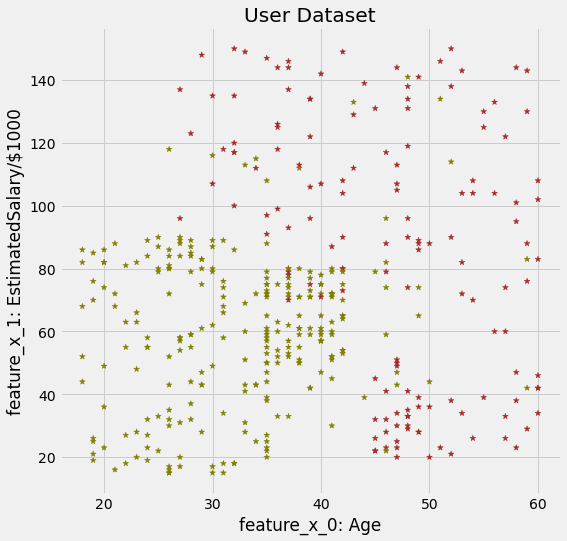

In [10]:
colors = ["olive" if label == 0 else "brown" for label in y]

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c = colors, marker = "*")
plt.xlabel("feature_x_0: Age")
plt.ylabel("feature_x_1: EstimatedSalary/$1000")
plt.title("User Dataset")
plt.show()

I will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in sklearn.model_selection to split the dataset into the training set and test set.

In [11]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

c_train = ["olive" if label == 0 else "brown" for label in y_train]
c_test = ["olive" if label == 0 else "brown" for label in y_test]

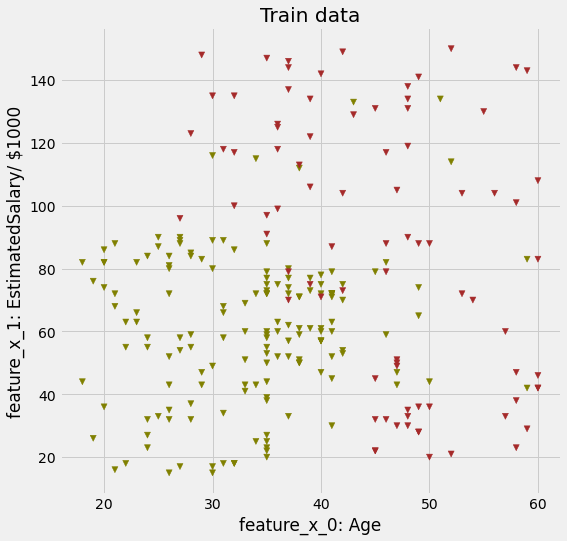

In [13]:
# Visualize training data
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:,1], c = c_train, marker = "v")
plt.xlabel("feature_x_0: Age")
plt.ylabel("feature_x_1: EstimatedSalary/ $1000")
plt.title('Train data')
plt.show()

In [14]:
features = ["x_0,","x_1"]
labels = ["olive","brown"]


We will use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) from sklearn to train a decision tree model. The maximum depth of the tree is 2.

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

I will use [tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to visualize the tree. 

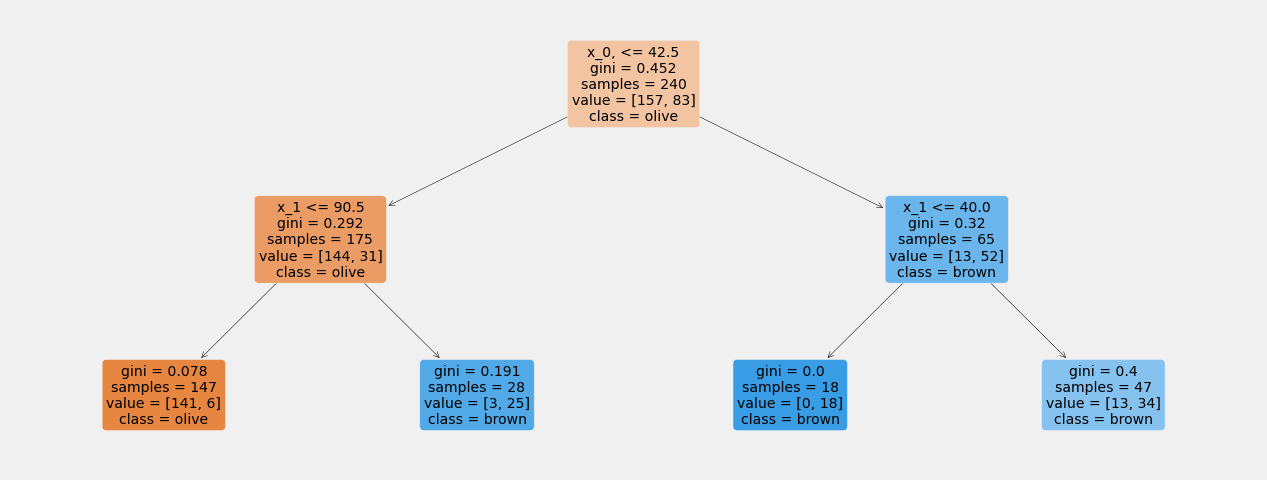

In [16]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

I will use [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) in sklearn.tree to build a text report showing the rules of a decision tree.

In [17]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- x_0, <= 42.50
|   |--- x_1 <= 90.50
|   |   |--- class: 0
|   |--- x_1 >  90.50
|   |   |--- class: 1
|--- x_0, >  42.50
|   |--- x_1 <= 40.00
|   |   |--- class: 1
|   |--- x_1 >  40.00
|   |   |--- class: 1



The decision boundaries from our trained tree are shown below. The broad backdrop colors indicate that the region belongs to a class, and each point will have a color that identifies the class to which it was allocated. We can see that several points have been misclassified.

Text(0, 0.5, 'feature: x_1')

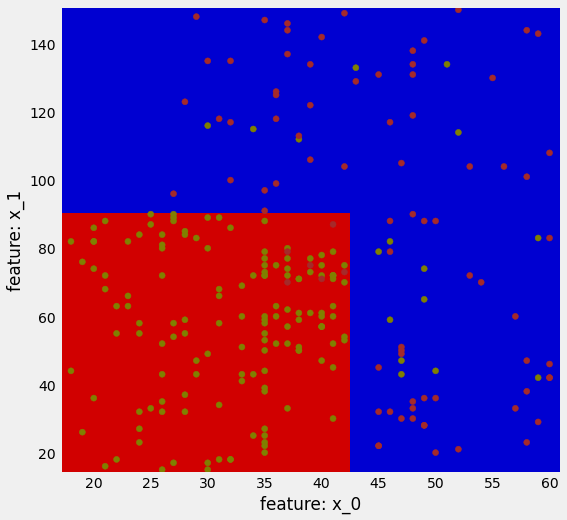

In [19]:
# Set a plot_step for training data
plot_step = 0.02
plt.figure(figsize=(8, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

### The Confusion Matrix.

A Confusion matrix is a N x N matrix that is used to evaluate the performance of a classification model, with N being the number of target classes. The matrix compares the actual target values to the machine learning model's anticipated values. This provides us with a comprehensive picture of how well our classification model is working and the kind of errors it is producing.

In many instances we are interested in the following:
 * true positives -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negatives -> predicted false but actually true
 * true negatives -> predicted false and actually false

All of these possibilities are contained in the confusion matrix. For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:
<img src="https://miro.medium.com/max/1000/1*fxiTNIgOyvAombPJx5KGeA.png" width="400" height="300" />



I will use [metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to compute confusion matrix to evaluate the accuracy of a classification.

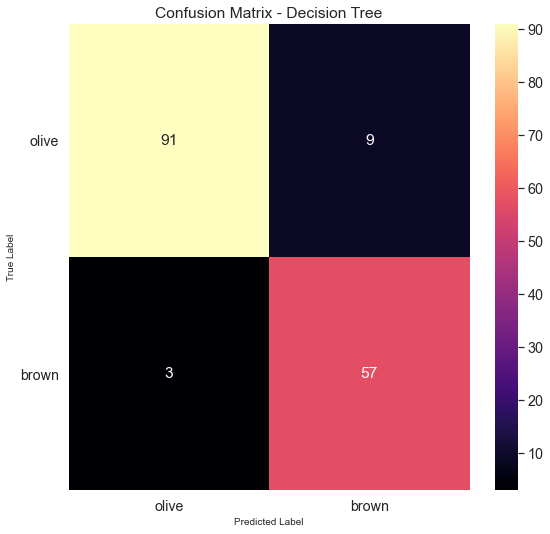

In [21]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(8, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)
plt.show()

* True Positive (TP) = 91; meaning 91 positive class data points were correctly classified by the model
* True Negative (TN) = 57; meaning 57 negative class data points were correctly classified by the model
* False Positive (FP) = 9; meaning 9 negative class data points were incorrectly classified as belonging to the positive class by the model
* False Negative (FN) = 3; meaning 3 positive class data points were incorrectly classified as belonging to the negative class by the model

In [22]:
print(metrics.confusion_matrix(y_test,test_pred_decision_tree))

[[91  9]
 [ 3 57]]


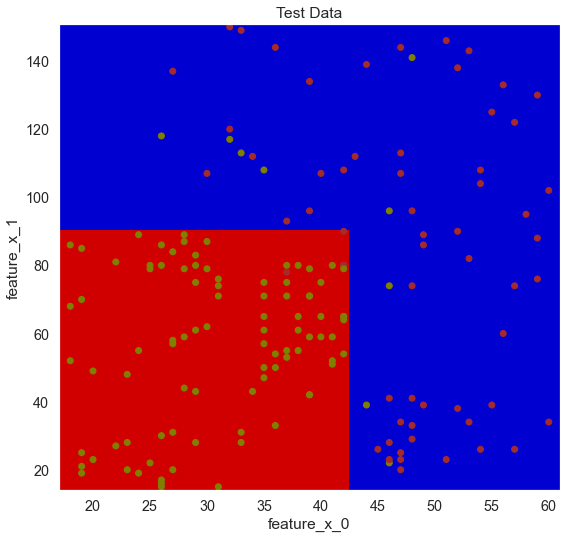

In [23]:
#Set a plot_step for test data
plot_step = 0.02

plt.figure(figsize=(8,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_test[:,0],X_test[:,1],c = c_test)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Test Data")
plt.show()

###  the Accuracy
$$\mbox{Accuracy} = \frac{TP+TN}{TP+FP+TN+FN}$$

In [24]:
print(f"accuracy score = {metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score = 0.925


### Precision vs. Recall
* Precision tells us how many of the correctly predicted cases actually turned out to be positive.
$$\text{Precision} = \frac{TP}{TP+FP}$$
* Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
$$\text{Recall} = \frac{TP}{TP+FN}$$

### F1-score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value. F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.
$$\mbox{F1-score}=\frac{2}{\frac{1}{\mbox{Recall}}+\frac{1}{\mbox{Precision}}}$$

In [25]:
print(f"predicion score")
precision = metrics.precision_score(y_test,test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision,index=labels)
precision_results.rename(columns={0:"precision"},inplace=True)
precision_results

predicion score


,precision
olive,0.968085
brown,0.863636


In [26]:
print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       100
           1       0.86      0.95      0.90        60

    accuracy                           0.93       160
   macro avg       0.92      0.93      0.92       160
weighted avg       0.93      0.93      0.93       160



## Part Two: Decision tree for Regression

In [27]:
ic = pd.read_csv('IceCreamData.csv')  
ic.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [28]:
X = ic['Temperature'].values
y = ic['Revenue'].values

Text(0.5, 1.0, 'IceCream Data')

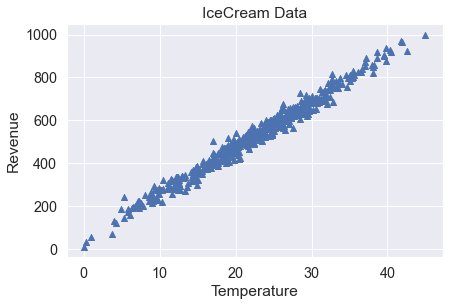

In [29]:
plt.scatter(X,y, marker = "^")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title("IceCream Data")

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

We will use the DecisionTreeRegressor from sklearn. Documentation can be found at [tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [31]:
# Training the Decision Tree Regression model on the training set
# We use the reshape(-1,1) to reshape our variables to a single column vector.

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(max_depth=3, random_state=42)

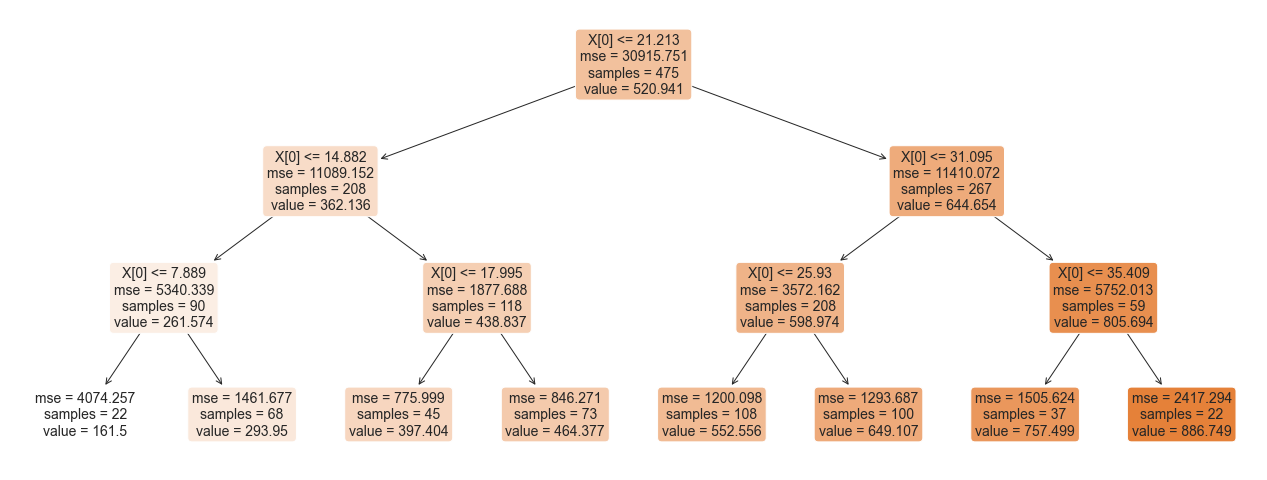

In [32]:
plt.figure(figsize=(20,8))
a = tree.plot_tree(regressor,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

In [33]:
# Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([649.10663099, 649.10663099, 552.5557731 , 552.5557731 ,
       397.40407547, 886.74881374, 886.74881374, 293.95015782,
       757.49879575, 293.95015782, 397.40407547, 886.74881374,
       552.5557731 , 293.95015782, 464.37731801, 464.37731801,
       397.40407547, 649.10663099, 552.5557731 , 464.37731801,
       552.5557731 , 464.37731801, 464.37731801, 464.37731801,
       649.10663099])

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

52.022058892320295

In this graph, the Real values are plotted with “green” color and the Predicted values are plotted with “chocolate” color. The plot of the Decision Tree Regression model is also drawn in “gold” color.

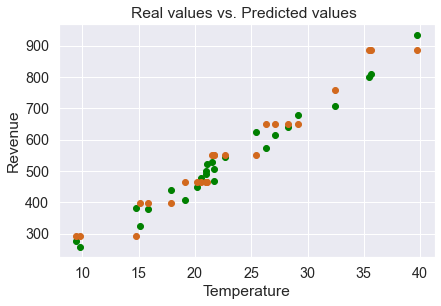

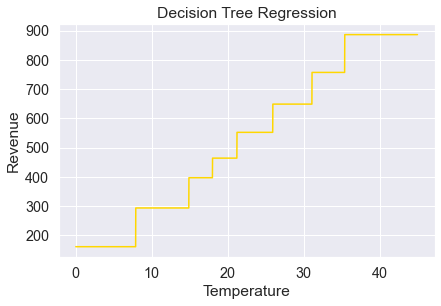

In [35]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'green')
plt.scatter(X_test, y_pred, color = 'chocolate')
plt.title('Real values vs. Predicted values ')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'gold')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

## Reference
R, A. (2021, August 12). The Basics Of Decision Trees. Decision Tree Algorithms - Part 1 | By Arif R | DataDrivenInvestor. Medium. https://medium.datadriveninvestor.com/the-basics-of-decision-trees-e5837cc2aba7.
